# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | imisli
City not found. Skipping...
Processing Record 4 of Set 1 | ust-kulom
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 8 of Set 1 | ravar
Processing Record 9 of Set 1 | caravelas
Processing Record 10 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 1 | bakel
Processing Record 12 of Set 1 | srivardhan
Processing Record 13 of Set 1 | the valley
Processing Record 14 of Set 1 | grindavik
Processing Record 15 of Set 1 | sharanga
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | sokoni
Processing Record 20 of Set 1 | inhambane
Processing Record 21 of Set 1 | p

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.0707,172.7902,27.57,81,8,7.68,KI,1675487657
1,bengkulu,-3.8004,102.2655,28.34,69,99,3.95,ID,1675487555
2,ust-kulom,61.6864,53.6902,-11.47,99,99,1.61,RU,1675487658
3,rikitea,-23.1203,-134.9692,25.87,74,100,2.05,PF,1675487444
4,hobart,-42.8794,147.3294,15.70,92,75,8.23,AU,1675487532


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butaritari,3.0707,172.7902,27.57,81,8,7.68,KI,1675487657
1,bengkulu,-3.8004,102.2655,28.34,69,99,3.95,ID,1675487555
2,ust-kulom,61.6864,53.6902,-11.47,99,99,1.61,RU,1675487658
3,rikitea,-23.1203,-134.9692,25.87,74,100,2.05,PF,1675487444
4,hobart,-42.8794,147.3294,15.70,92,75,8.23,AU,1675487532


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

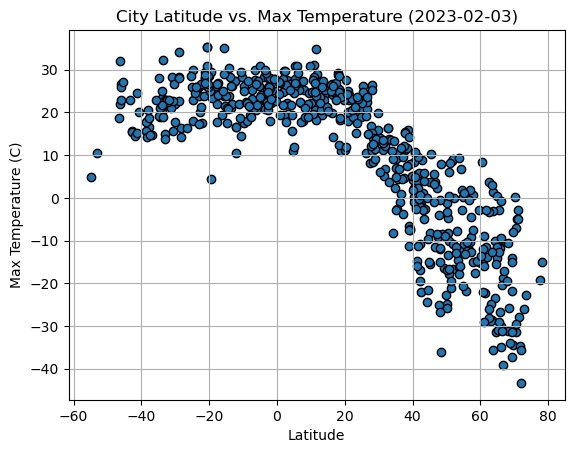

In [15]:
today = datetime.datetime.now().strftime("%Y-%m-%d")

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

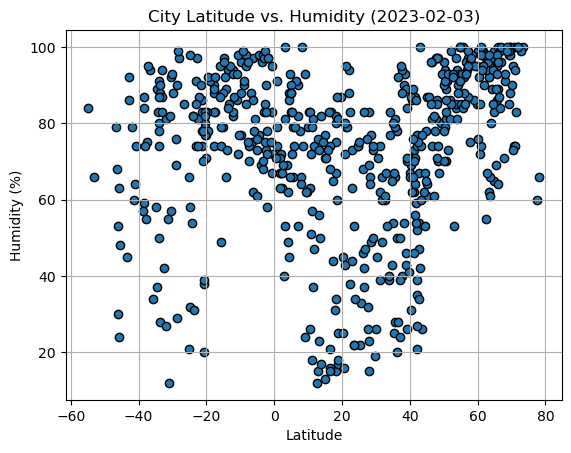

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

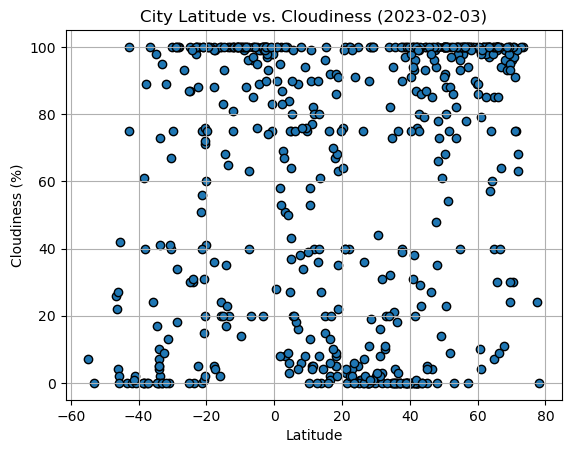

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

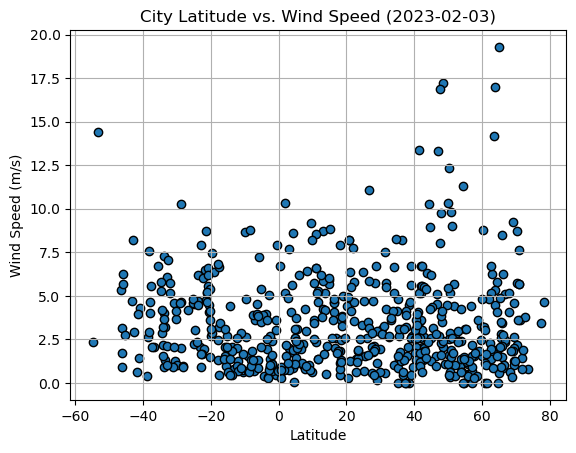

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
#def linear_regression_plot(x_values, y_values, x_label, y_label, title, file_name):
   #(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    #regress_values = x_values * slope + intercept
    #line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butaritari,3.0707,172.7902,27.57,81,8,7.68,KI,1675487657
2,ust-kulom,61.6864,53.6902,-11.47,99,99,1.61,RU,1675487658
5,ravar,31.2656,56.8055,11.16,39,16,0.55,IR,1675487658
7,bakel,14.9050,-12.4568,20.61,13,15,5.93,SN,1675487659
8,srivardhan,18.0333,73.0167,29.26,31,67,1.16,IN,1675487660


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bengkulu,-3.8004,102.2655,28.34,69,99,3.95,ID,1675487555
3,rikitea,-23.1203,-134.9692,25.87,74,100,2.05,PF,1675487444
4,hobart,-42.8794,147.3294,15.70,92,75,8.23,AU,1675487532
6,caravelas,-17.7125,-39.2481,24.38,88,5,3.20,BR,1675487659
12,busselton,-33.6500,115.3333,32.23,28,2,3.22,AU,1675487459


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8738452407497963


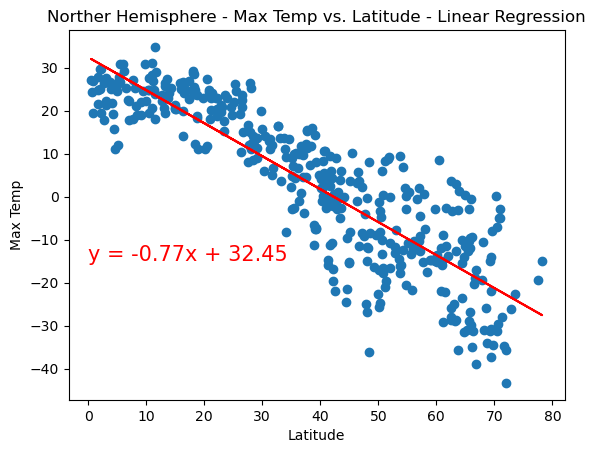

In [30]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the regression line
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")

# Annotate the plot with the line equation
plt.annotate(line_eq, (0,-15), fontsize=15, color="red")

# Label the plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude - Linear Regression")

#Print the R Value
print(f"The r-value is: {rvalue}")

# Show the plot
plt.show()

The r-value is: 0.29918770148134277


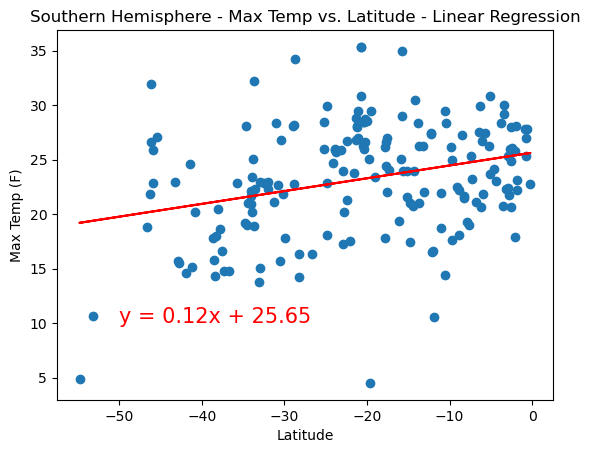

In [45]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,10), fontsize=15, color="red")

# Add labels and titles
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude - Linear Regression")

#Print the R Value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a strong negative correlation between latitude and maximum temperature in the northern hemisphere (-0.87 as I am writing this on 2/3/23), while there is weak positive correlation for the southern hemisphere (0.30). Temperatures lower in relationship to the North and South poles, though this data indicates a clearer correlation in the Northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4391823691379168


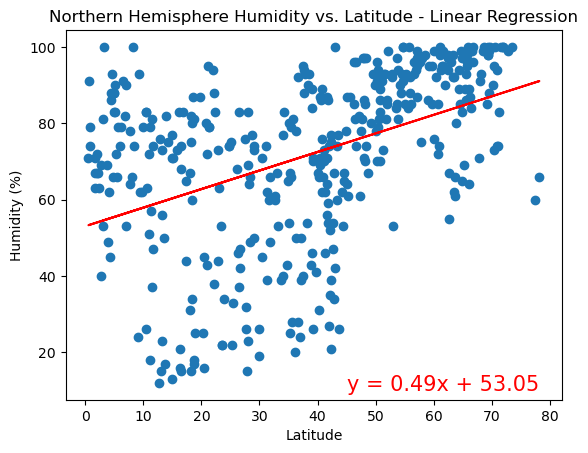

In [95]:
# Northern Hemisphere Humidity vs. Latitude Linear Regression Plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (45, 10), fontsize=15, color="red")


# Incorporate graph properties
plt.title("Northern Hemisphere Humidity vs. Latitude - Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Print the R Value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

The r-value is: 0.3333649455829096


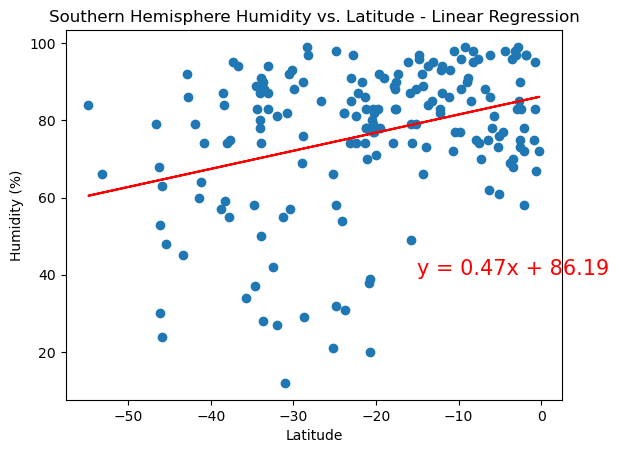

In [94]:
# Southern Hemisphere Humidity vs. Latitude Linear Regression Plot
# Define x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-15,40), fontsize=15, color="red")

# Incorporate graph properties
plt.title("Southern Hemisphere Humidity vs. Latitude - Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Print the R Value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The Northern and Southern hemispheres show a weak positive correlation for humidity vs. latitude, with respective R values of 0.44 and 0.33. This suggests that as you move away from the equator there may be a little more humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3440619182177183


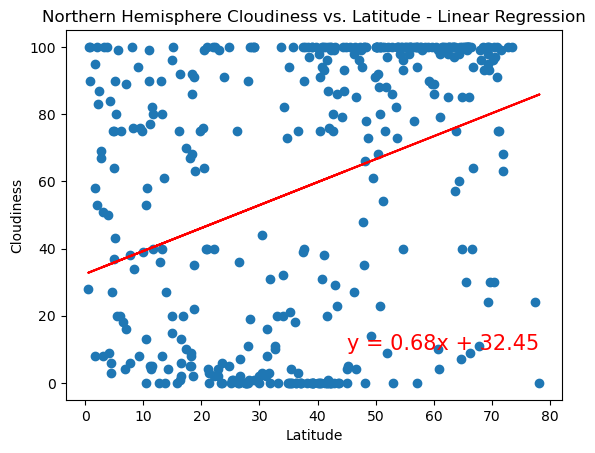

In [92]:
# Northern Hemisphere Cloudiness vs. Latitude Linear Regression Plot
# Define x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (45, 10), fontsize=15, color="red")

# Incorporate graph properties
plt.title("Northern Hemisphere Cloudiness vs. Latitude - Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Print the R Value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

The r-value is: 0.5870650054645183


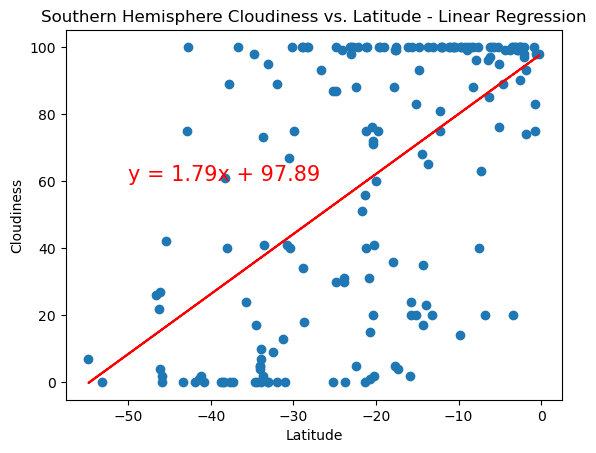

In [93]:
# Southern Hemisphere Cloudiness vs. Latitude Linear Regression Plot
# Define x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50, 60), fontsize=15, color="red")

# Incorporate graph properties
plt.title("Southern Hemisphere Cloudiness vs. Latitude - Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Print the R Value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The Northern and Southern hemispheres show a weak positive correlation for cloudiness vs. latitude, with respective R values of 0.34 and 0.37. This suggests that as you move away from the equator there may be a little more cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.003254408587969075


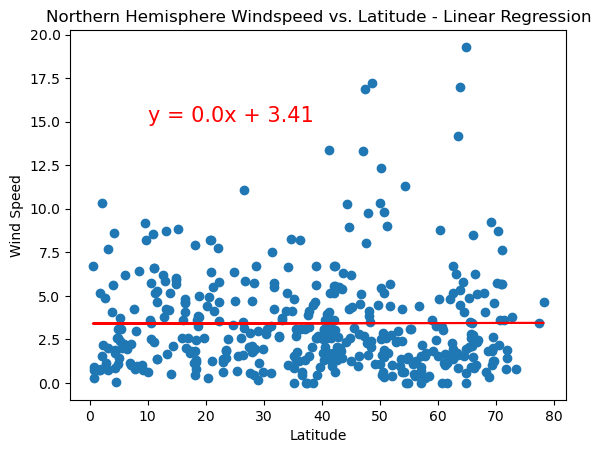

In [75]:
# Northern Hemisphere Windspeed vs. Latitude Linear Regression Plot
# Define x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10, 15), fontsize=15, color="red")

# Incorporate graph properties
plt.title("Northern Hemisphere Windspeed vs. Latitude - Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#Print the R Value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

The r-value is: -0.2901938516375979


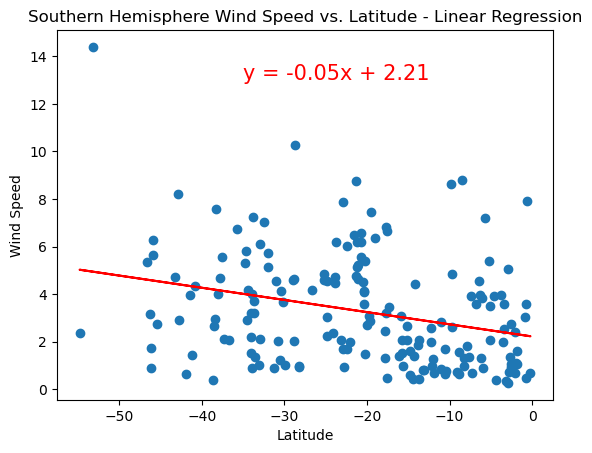

In [74]:
# Southern Hemisphere Wind Speed vs. Latitude Linear Regression Plot
# Define x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-35, 13), fontsize=15, color="red")

# Incorporate graph properties
plt.title("Southern Hemisphere Wind Speed vs. Latitude - Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#Print the R Value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The Northern and Southern hemispheres show very week correlations of wind speed vs. latitude, with respective R values of 0.003 and -0.17. This suggests that latitude has little to no effect on windspeed. 